**1**.DATA PREPROCESSING

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime


In [2]:
# Load the dataset
df = pd.read_csv('/content/Website Traffic Analysis.csv')

# Display the first few rows to understand its structure
print(df.head())


   Row        Day  Day.Of.Week       Date Page.Loads Unique.Visits  \
0    1     Sunday            1  9/14/2014      2,146         1,582   
1    2     Monday            2  9/15/2014      3,621         2,528   
2    3    Tuesday            3  9/16/2014      3,698         2,630   
3    4  Wednesday            4  9/17/2014      3,667         2,614   
4    5   Thursday            5  9/18/2014      3,316         2,366   

  First.Time.Visits Returning.Visits  
0             1,430              152  
1             2,297              231  
2             2,352              278  
3             2,327              287  
4             2,130              236  


In [3]:
# Check for missing values
print(df.isnull().sum())

# If there are missing values, you can handle them by filling with a specific value or using interpolation methods.
# For example, filling missing values with 0:
df.fillna(0, inplace=True)


Row                  0
Day                  0
Day.Of.Week          0
Date                 0
Page.Loads           0
Unique.Visits        0
First.Time.Visits    0
Returning.Visits     0
dtype: int64


In [10]:
# Save the preprocessed dataset to a new CSV file
df.to_csv('/content/Website Traffic Analysis.csv', index=False)


**2.EXPLOEATORY DATA ANALYSIS**

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the preprocessed dataset
df = pd.read_csv('/content/Website Traffic Analysis.csv')

# Display the first few rows to understand its structure
print(df.head())


   Row        Day  Day.Of.Week       Date Page.Loads Unique.Visits  \
0    1     Sunday            1  9/14/2014      2,146         1,582   
1    2     Monday            2  9/15/2014      3,621         2,528   
2    3    Tuesday            3  9/16/2014      3,698         2,630   
3    4  Wednesday            4  9/17/2014      3,667         2,614   
4    5   Thursday            5  9/18/2014      3,316         2,366   

  First.Time.Visits Returning.Visits  
0             1,430              152  
1             2,297              231  
2             2,352              278  
3             2,327              287  
4             2,130              236  


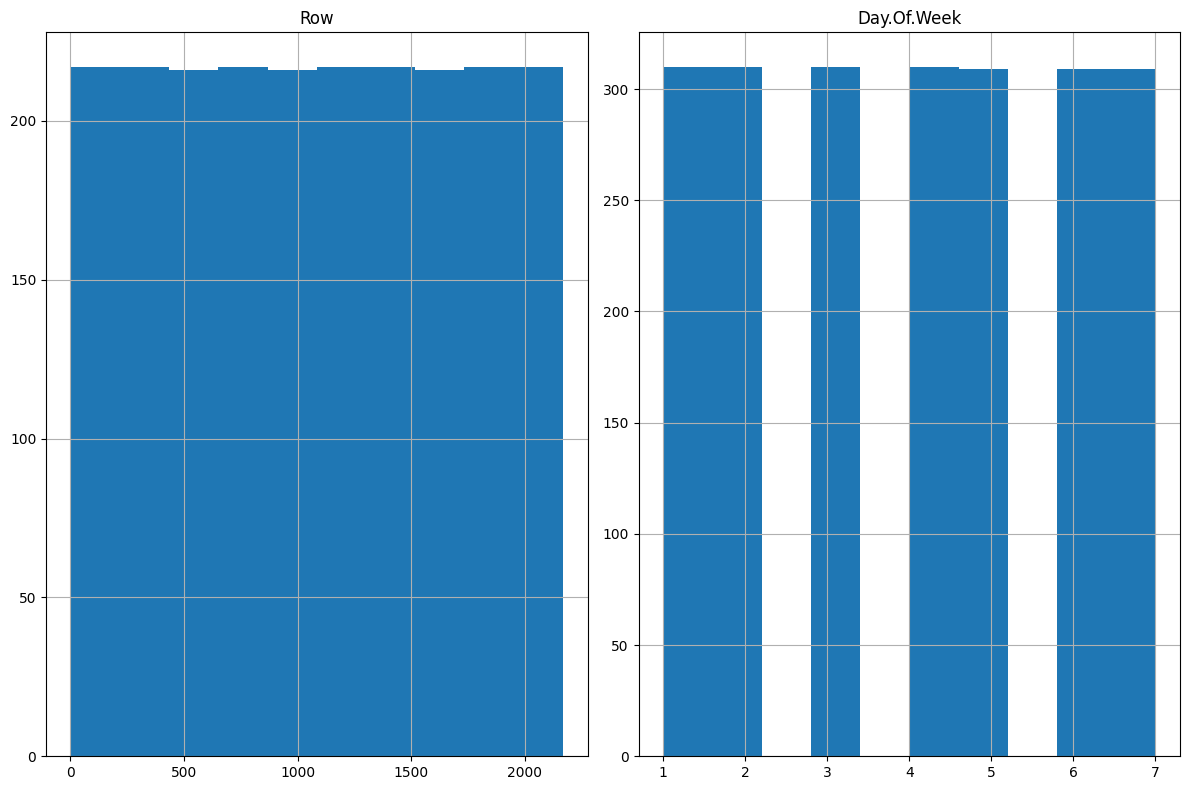

In [12]:
# Histograms of numerical variables
df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()


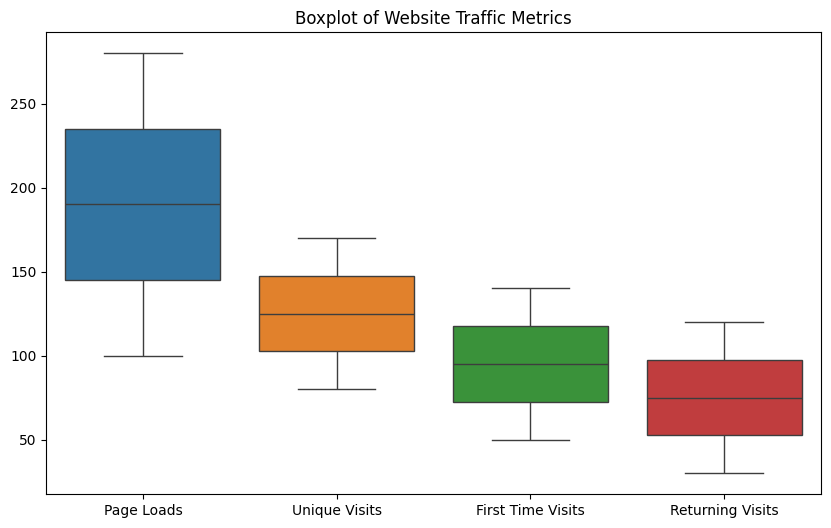

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your dataset containing columns: Page Loads, Unique Visits, First Time Visits, Returning Visits

# Generate some sample data (you would load your actual dataset here)
data = {
    'Page Loads': [100, 120, 140, 160, 180, 200, 220, 240, 260, 280],
    'Unique Visits': [80, 90, 100, 110, 120, 130, 140, 150, 160, 170],
    'First Time Visits': [50, 60, 70, 80, 90, 100, 110, 120, 130, 140],
    'Returning Visits': [30, 40, 50, 60, 70, 80, 90, 100, 110, 120]
}

df = pd.DataFrame(data)

# Boxplots to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Page Loads', 'Unique Visits', 'First Time Visits', 'Returning Visits']])
plt.title('Boxplot of Website Traffic Metrics')
plt.show()


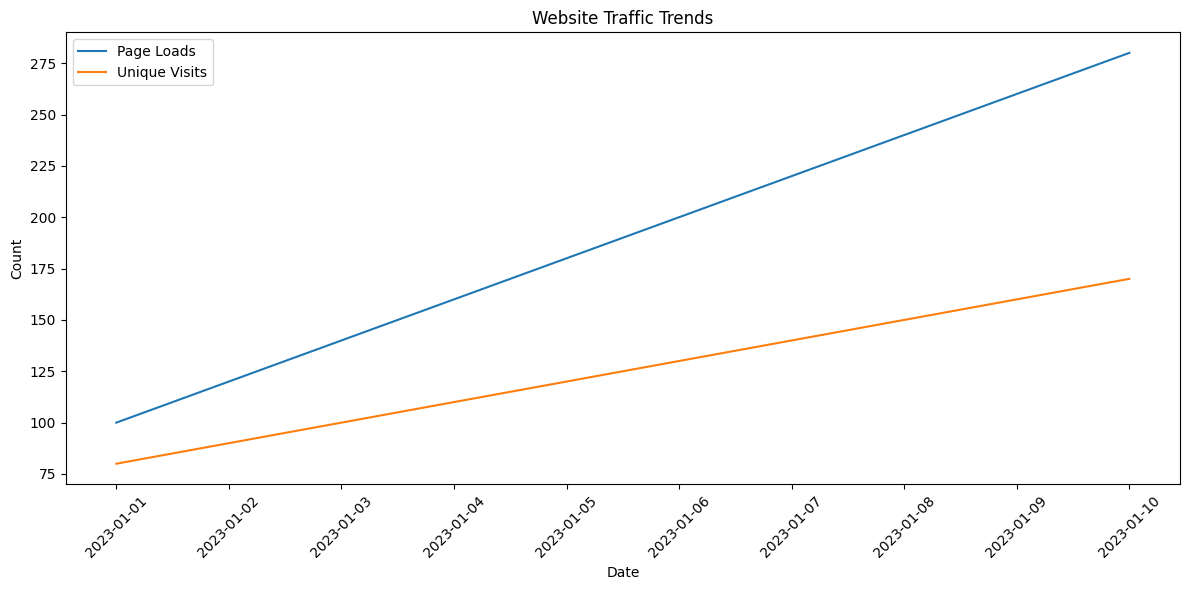

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your dataset containing columns: Page Loads, Unique Visits, First Time Visits, Returning Visits

# Generate some sample data (you would load your actual dataset here)
data = {
    'Date': pd.date_range(start='2023-01-01', periods=10), # Add a Date column
    'Page Loads': [100, 120, 140, 160, 180, 200, 220, 240, 260, 280],
    'Unique Visits': [80, 90, 100, 110, 120, 130, 140, 150, 160, 170],
    'First Time Visits': [50, 60, 70, 80, 90, 100, 110, 120, 130, 140],
    'Returning Visits': [30, 40, 50, 60, 70, 80, 90, 100, 110, 120]
}

df = pd.DataFrame(data)

# Line plot of traffic metrics over dates
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Page Loads', data=df, label='Page Loads')
sns.lineplot(x='Date', y='Unique Visits', data=df, label='Unique Visits')
plt.title('Website Traffic Trends')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-20-f096fe5e397a>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Day Of Week', y='Page Loads', data=df, estimator=np.mean, ci=None, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])


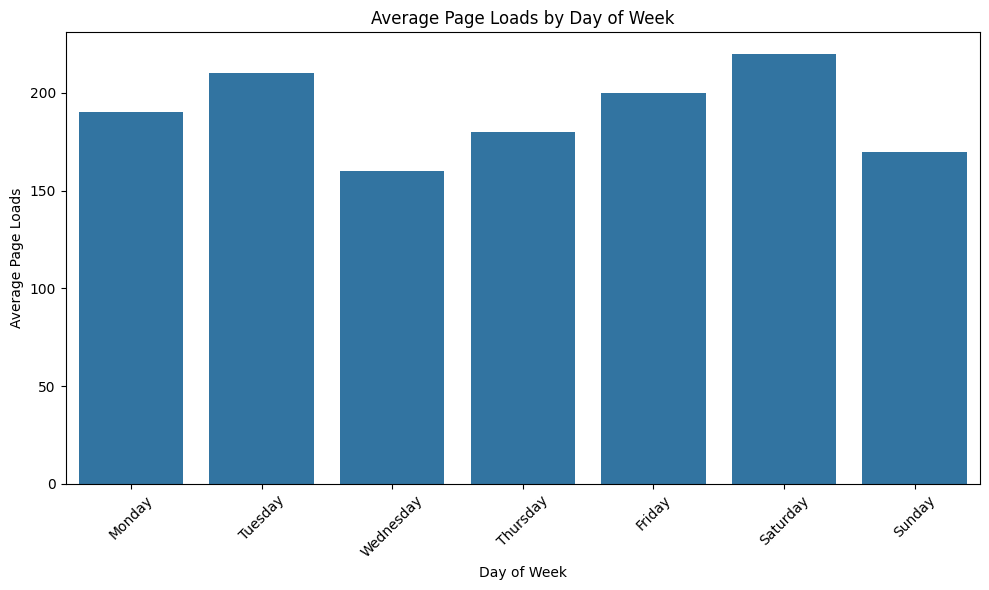

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your dataset containing columns: Date, Page Loads, etc.

# Extract day of week from the 'Date' column
df['Day Of Week'] = df['Date'].dt.day_name()

# Average page loads by day of week
plt.figure(figsize=(10, 6))
sns.barplot(x='Day Of Week', y='Page Loads', data=df, estimator=np.mean, ci=None, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Average Page Loads by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Page Loads')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

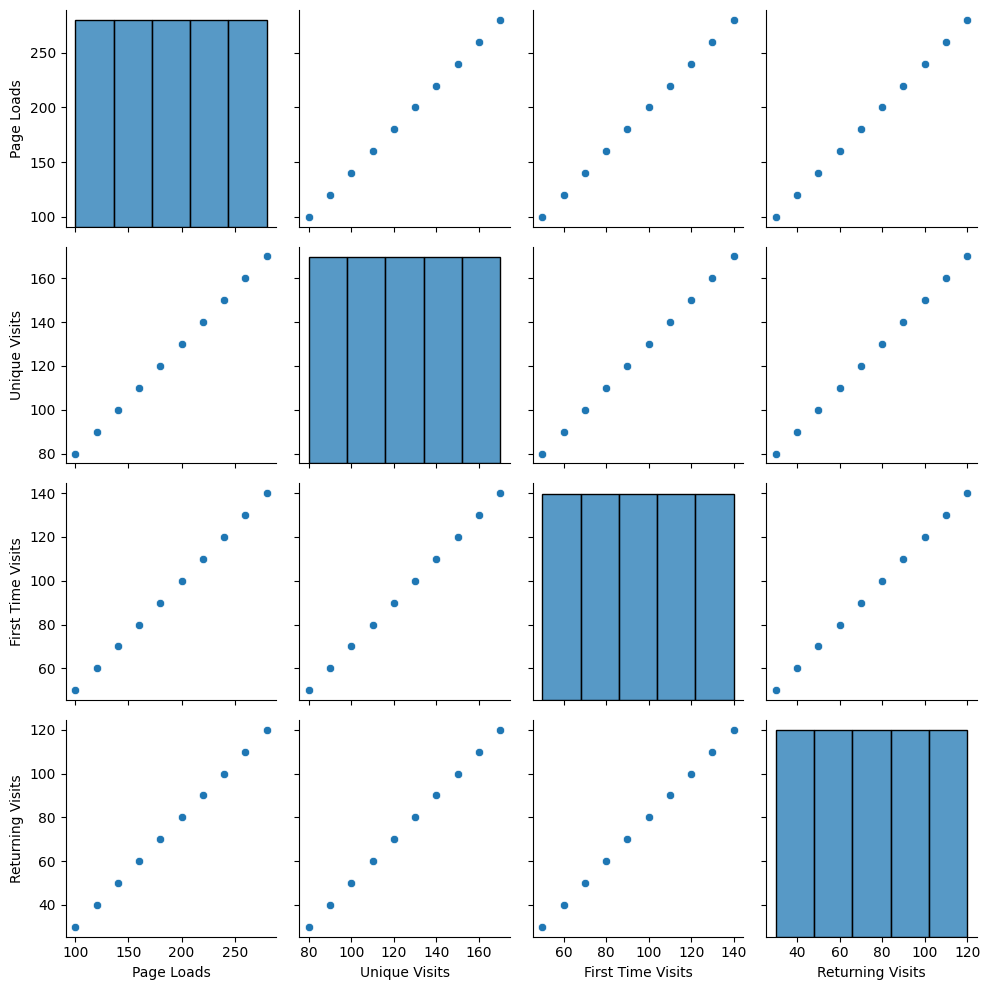

In [21]:
# Pairplot to visualize relationships between variables
sns.pairplot(df[['Page Loads', 'Unique Visits', 'First Time Visits', 'Returning Visits']])
plt.tight_layout()
plt.show()


**3.RFM ANALYSIS**

In [22]:
# Assuming df is your dataset containing 'Date' column
# Calculate the most recent date in the dataset
most_recent_date = df['Date'].max()

# Calculate recency for each row
df['Recency'] = most_recent_date - pd.to_datetime(df['Date'])
df['Recency'] = df['Recency'].dt.days  # Convert timedelta to days


In [23]:
# Calculate frequency based on the number of visits
# You can define your own logic based on what constitutes a visit or interaction
# For example, summing up 'Page Loads' could indicate frequency of visits
df['Frequency'] = df['Page Loads']


In [24]:
# Calculate engagement metrics
# You can adjust these calculations based on your specific definitions
df['Engagement'] = df['Unique Visits'] + df['First Time Visits'] + df['Returning Visits']


In [25]:
# Define RFM segments
def rfm_segment(row):
    if row['Recency'] <= 7 and row['Frequency'] >= 10 and row['Engagement'] >= 100:
        return 'High Value'
    elif (row['Recency'] <= 30 and row['Frequency'] >= 5 and row['Engagement'] >= 50) or (row['Recency'] <= 60 and row['Frequency'] >= 3 and row['Engagement'] >= 30):
        return 'Medium Value'
    else:
        return 'Low Value'

# Apply RFM segmentation
df['RFM Segment'] = df.apply(rfm_segment, axis=1)

# Count the number of users in each segment
rfm_counts = df['RFM Segment'].value_counts()
print(rfm_counts)


RFM Segment
High Value      8
Medium Value    2
Name: count, dtype: int64


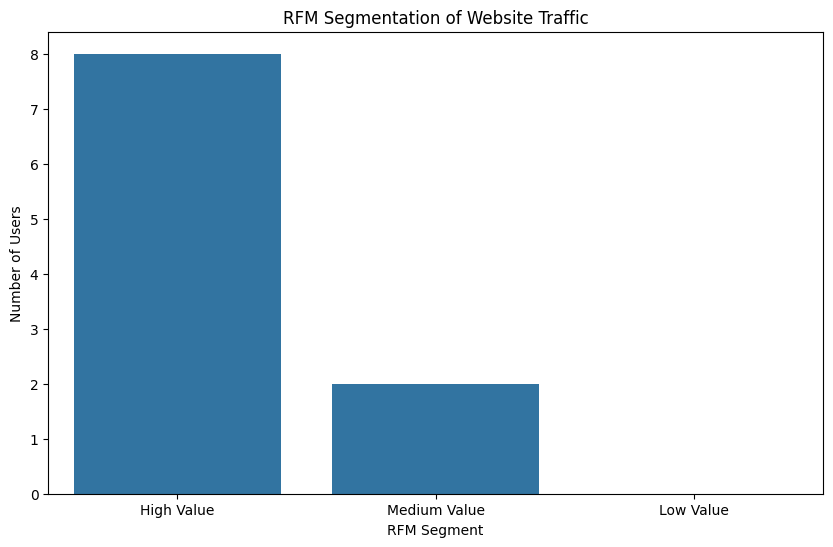

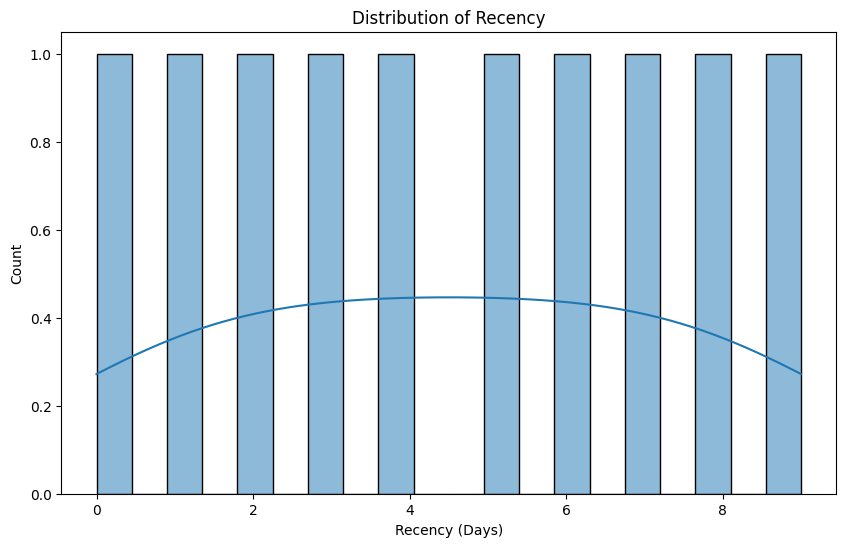

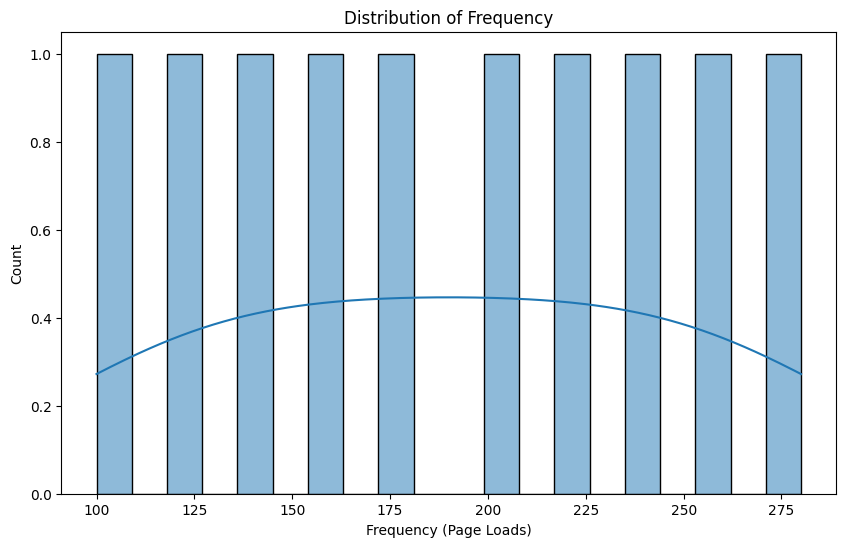

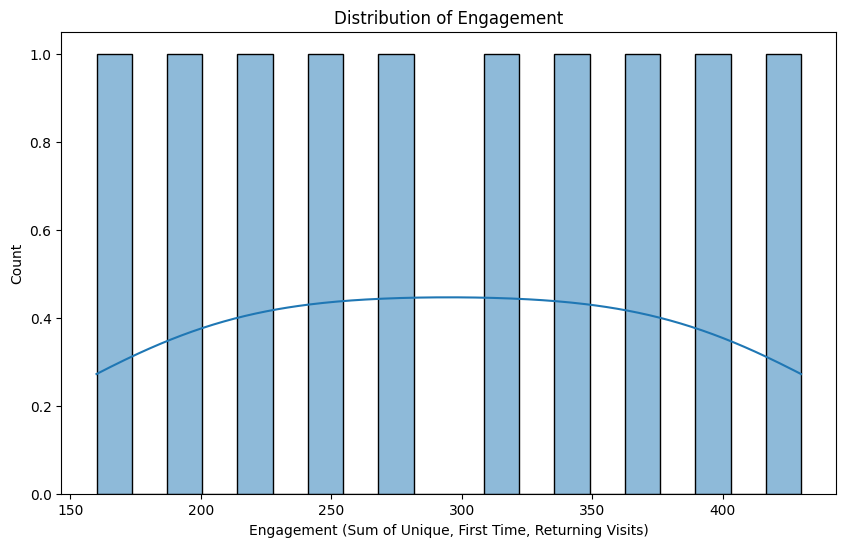

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define RFM segments
def rfm_segment(row):
    if row['Recency'] <= 7 and row['Frequency'] >= 10 and row['Engagement'] >= 100:
        return 'High Value'
    elif (row['Recency'] <= 30 and row['Frequency'] >= 5 and row['Engagement'] >= 50) or (row['Recency'] <= 60 and row['Frequency'] >= 3 and row['Engagement'] >= 30):
        return 'Medium Value'
    else:
        return 'Low Value'

# Apply RFM segmentation
df['RFM Segment'] = df.apply(rfm_segment, axis=1)

# Count the number of users in each segment
rfm_counts = df['RFM Segment'].value_counts()

# Visualize RFM segments
plt.figure(figsize=(10, 6))
sns.countplot(x='RFM Segment', data=df, order=['High Value', 'Medium Value', 'Low Value'])
plt.title('RFM Segmentation of Website Traffic')
plt.xlabel('RFM Segment')
plt.ylabel('Number of Users')
plt.show()

# Visualize Recency distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Recency'], bins=20, kde=True)
plt.title('Distribution of Recency')
plt.xlabel('Recency (Days)')
plt.ylabel('Count')
plt.show()

# Visualize Frequency distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Frequency'], bins=20, kde=True)
plt.title('Distribution of Frequency')
plt.xlabel('Frequency (Page Loads)')
plt.ylabel('Count')
plt.show()

# Visualize Engagement distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Engagement'], bins=20, kde=True)
plt.title('Distribution of Engagement')
plt.xlabel('Engagement (Sum of Unique, First Time, Returning Visits)')
plt.ylabel('Count')
plt.show()


**4.CUSTOMER SEGMENTATION**

In [31]:
import pandas as pd

# Attempt to load the dataset
try:
    df = pd.read_csv('/content/Website Traffic Analysis.csv')

    # Convert 'Date' column to datetime format
    df['Date'] = pd.to_datetime(df['Date'])

    # Calculate additional date-related features
    df['Day'] = df['Date'].dt.day
    df['Day Of Week'] = df['Date'].dt.day_name()

    # Display the first few rows to understand its structure
    print(df.head())

except FileNotFoundError:
    print("Error: File 'website_traffic.csv' not found. Please check the file path.")
except Exception as e:
    print("Error:", e)


Error: time data "10-01-2014" doesn't match format "%m/%d/%Y", at position 17. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Attempt to load the dataset
try:
    df = pd.read_csv('/content/Website Traffic Analysis.csv')  # Make sure the file path is correct

    # Convert 'Date' column to datetime format
    df['Date'] = pd.to_datetime(df['Date'])

    # Calculate additional date-related features
    df['Day'] = df['Date'].dt.day
    df['Day Of Week'] = df['Date'].dt.day_name()

    # Display the first few rows to understand its structure and verify column names
    print(df.head())

    # Visualize clusters based on different metrics/features
    plt.figure(figsize=(12, 8))

    # Plot Page Loads vs Unique Visits with clusters
    plt.subplot(2, 2, 1)
    # Check the actual column name for 'Page Loads' in your DataFrame and replace it below
    sns.scatterplot(x='Page Loads', y='Unique Visits', hue='Cluster', data=df, palette='viridis')
    plt.title('Page Loads vs Unique Visits')

    # Plot First Time Visits vs Returning Visits with clusters
    plt.subplot(2, 2, 2)
    sns.scatterplot(x='First Time Visits', y='Returning Visits', hue='Cluster', data=df, palette='viridis')
    plt.title('First Time Visits vs Returning Visits')

    # Plot Page Loads vs First Time Visits with clusters
    plt.subplot(2, 2, 3)
    # Check the actual column name for 'Page Loads' in your DataFrame and replace it below
    sns.scatterplot(x='Page Loads', y='First Time Visits', hue='Cluster', data=df, palette='viridis')
    plt.title('Page Loads vs First Time Visits')

    # Plot Unique Visits vs Returning Visits with clusters
    plt.subplot(2, 2, 4)
    sns.scatterplot(x='Unique Visits', y='Returning Visits', hue='Cluster', data=df, palette='viridis')
    plt.title('Unique Visits vs Returning Visits')

    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print("Error: File 'Website Traffic Analysis.csv' not found. Please check the file path.")
except Exception as e:
    print("Error:", e)

Error: time data "10-01-2014" doesn't match format "%m/%d/%Y", at position 17. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.
